In [1]:
import numpy as np
import scipy as sp
from numpy import linalg as nla
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

We implement the dimensionless system from ROBERTS ET AL. (2016):
$$\begin{align}
x'&=\rho \delta (x^2 - ax)+x[x+y+c-c\tanh (x+z)] \\
y'&=-\rho \delta(ay+x^2) \\
z'&=\delta(k-z-\frac{x}{2})
\end{align}$$
where:
$x=\frac{S}{S_0}=\frac{T_2-T_1}{S_0}$, $y=\frac{T}{T_0}=\frac{T_1-T_r}{T_0}$, $z=\frac{h}{h_0}=\frac{h_1+H-z_0}{h_0}=\frac{h_1+K}{h_0}$ 

$T_1$ and $T_2$ are the equatorial temperatures respectively in the western and eastern Pacific, $T_r$ is the temperature that the tropical Pacific would attain in the absence of ocean dynamics, $h_1$ is the thermocline depth of the western Pacific, $H$ is the an eastern thermocline reference depth.

We now work in a periodically forced system: $a(t)=7.3939+0.002sin(1.8t)$

In [2]:
def model(r,tc):
    x=r[0]
    y=r[1]
    z=r[2]
    rho=0.3224
    delta=0.225423
    a=7.3939+0.002*np.sin(1.8*tc)
    k=0.4032
    c=2.3952
    x1=1.0*(rho*delta*(x*x-a*x)+x*(x+y+c-c*np.tanh(x+z)))
    y1=-1.0*rho*delta*(a*y+x*x)
    z1=delta*(k-z-0.5*x)
    return (np.array([x1,y1,z1]))

The version of order 4 Runge-Kutta I will implement is, for a differential equation $\dot{y}=f(t,y)$:
$$k_1=f(t_n,y_n)$$
$$k_2=f(t_n+\frac{h}{2},y_n+\frac{k_1}{2})$$
$$k_3=f(t_n+\frac{h}{2},y_n+\frac{k_2}{2})$$
$$k_4=f(t_n+h,y_n+k_1)$$
$$y_{n+1}=y_n+\frac{h}{6}(k_1+2k_2+2k_3+k_4)$$

In [ ]:
tmax=2000000
h=0.01
t=0
x=-3
y=0
z=0
valx=[x]
valy=[y]
valz=[z]
valt=[0]
g=[-0.0303*x+0.3600*y+0.9325*z]
r=np.array([x,y,z])
while (t<tmax):
    tc=t
    k1=model(r,tc)
    k2=model(r+0.5*h*k1,tc)
    k3=model(r+0.5*h*k2,tc)
    k4=model(r+k3*h,tc)
    
    r=r+(1.0/6)*h*(k1+2*k2+2*k3+k4)
    valx.append(r[0])
    valy.append(r[1])
    valz.append(r[2])
    g.append(-0.0303*r[0]+0.3600*r[1]+0.9325*r[2])
    t=t+h
    valt.append(t)     

<IPython.core.display.Javascript object>


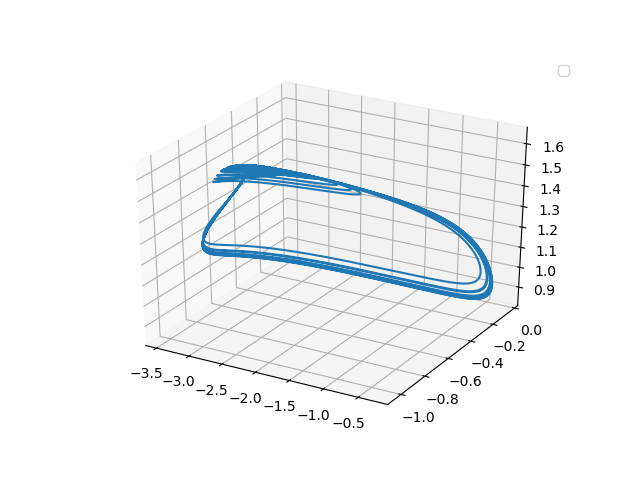

No handles with labels found to put in legend.


In [19]:
del valx[0:10000]
del valy[0:10000]
del valz[0:10000]
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(valx, valy, valz)
ax.legend()

plt.show()

<IPython.core.display.Javascript object>


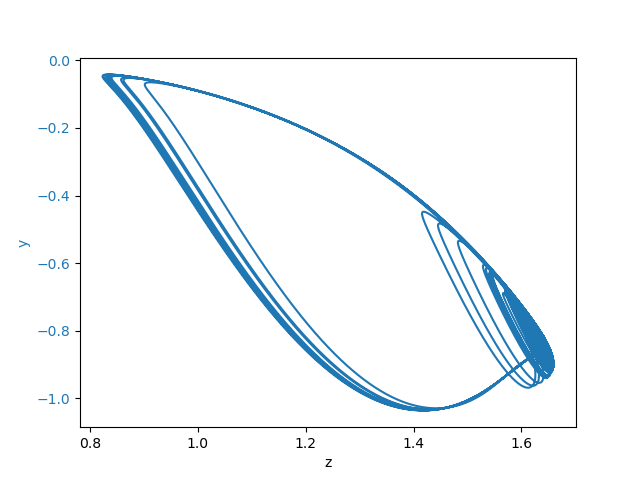

In [20]:
fig2, ax2 = plt.subplots()

color = 'tab:blue'
ax2.set_xlabel('z')
ax2.set_ylabel('y', color=color)
ax2.plot(valz, valy, color=color)
ax2.tick_params(axis='y', labelcolor=color)

In [10]:
#del valx[0:10000]
#del valy[0:10000]
#del valz[0:10000]
#del valt[0:10000]
#del g[0:10000]

In [23]:
print (len(g))
print (len(valt))
print (valt[4990000])
print (tmax)

4990001
4990001
50000.000001199216
50000


<IPython.core.display.Javascript object>


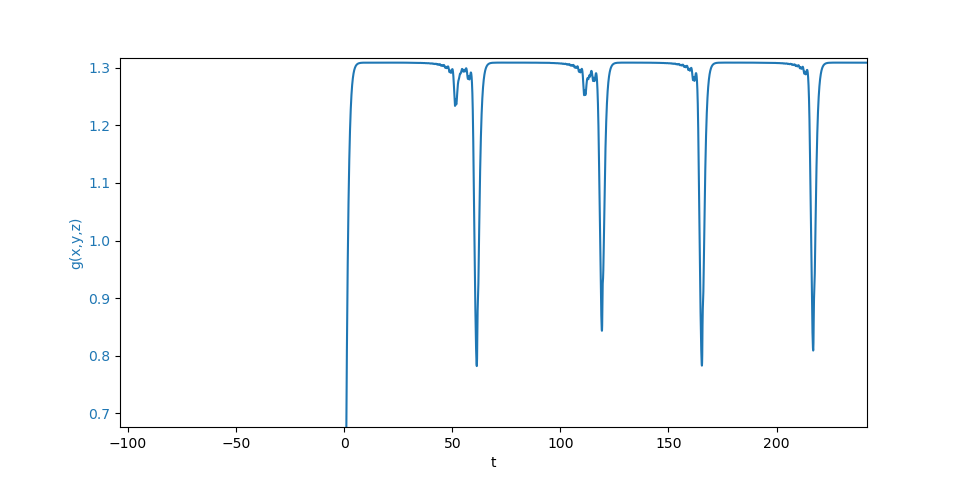

In [54]:
%matplotlib notebook
fig3, ax3 = plt.subplots()

color = 'tab:blue'
ax3.set_xlabel('t')
ax3.set_ylabel('g(x,y,z)', color=color)
ax3.plot(valt, g, color=color)
ax3.tick_params(axis='y', labelcolor=color)

In [ ]:
i=0
epoch=[]
print(len(valt))
while (i<(len(valt)-1)):
    if (g[i]>1.2):
        ti=valt[i]
        i=i+1
        while (g[i]>1.2):
            i=i+1
        tf=valt[i]
        print(tf-ti)
        epoch.append(tf-ti)
    i=i+1
print (epoch)
print(g[4985799])

In [41]:
print(g[4985800])

1.2005778611908229


<IPython.core.display.Javascript object>


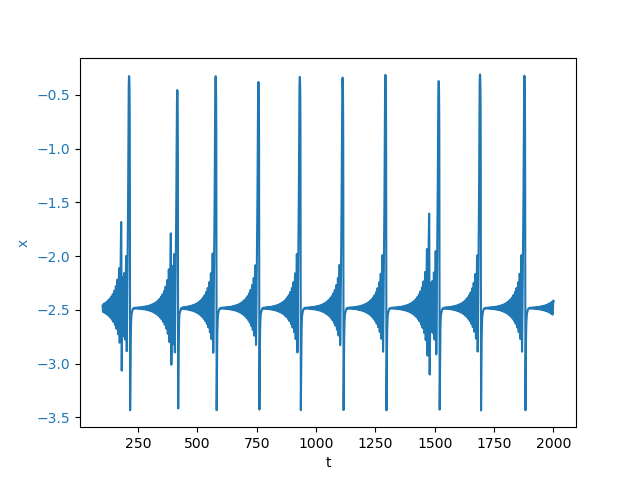

In [22]:

fig4, ax4 = plt.subplots()

color = 'tab:blue'
ax4.set_xlabel('t')
ax4.set_ylabel('x', color=color)
ax4.plot(valt, valx, color=color)
ax4.tick_params(axis='y', labelcolor=color)